<a href="https://colab.research.google.com/github/ibra666/PCVK_Genap_2023_3E/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

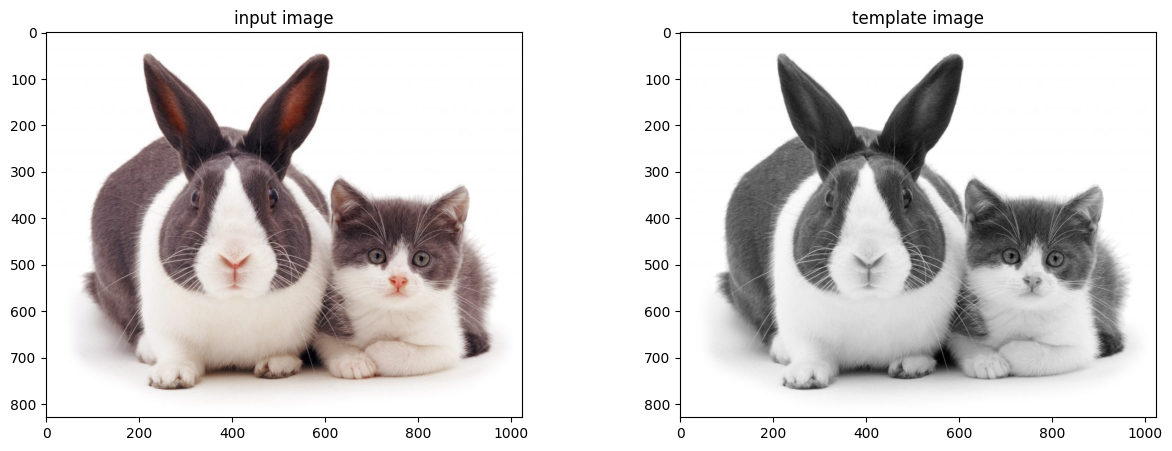

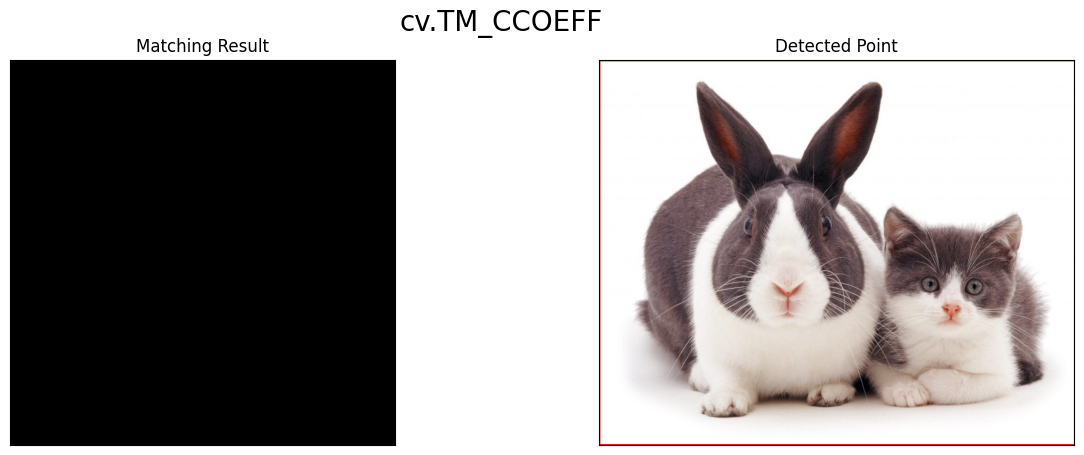

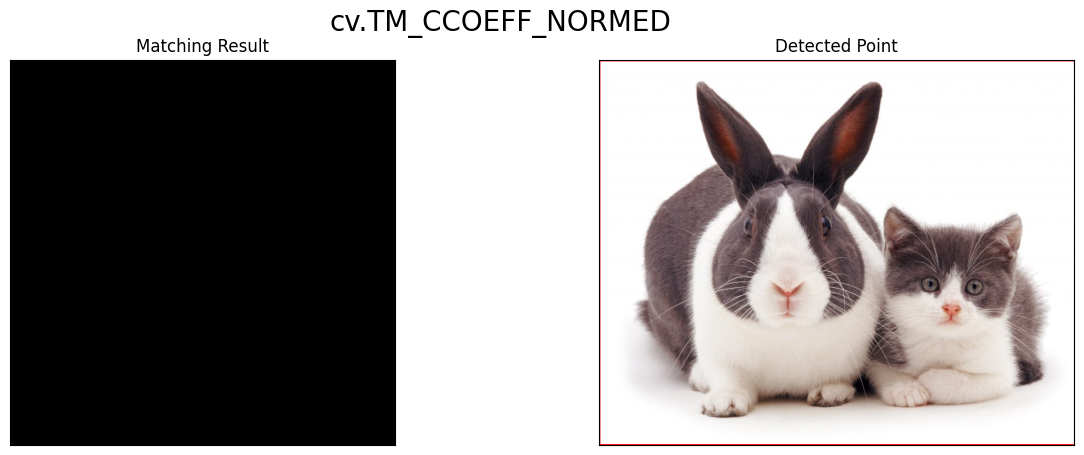

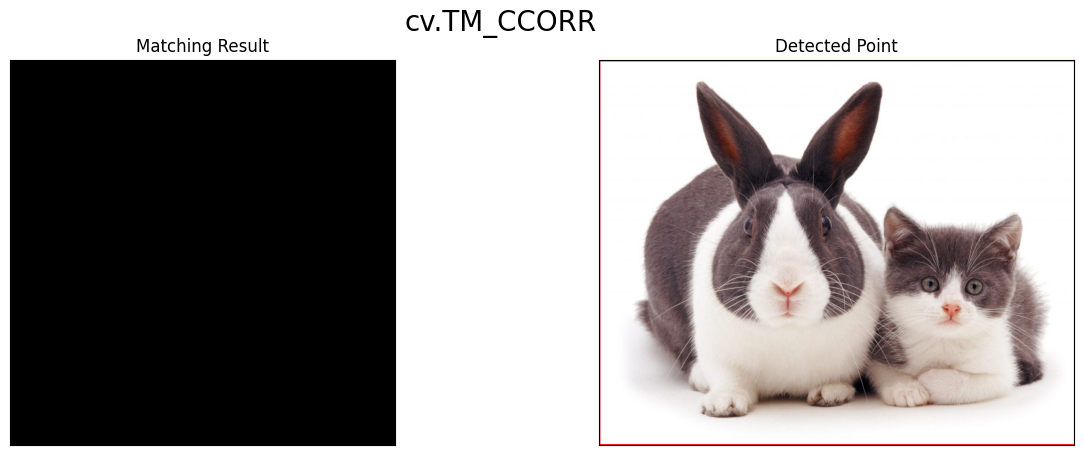

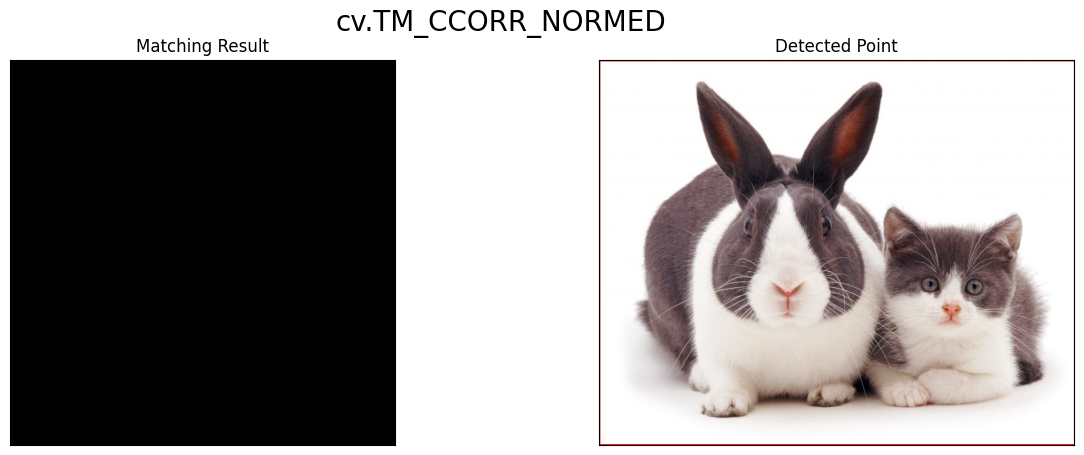

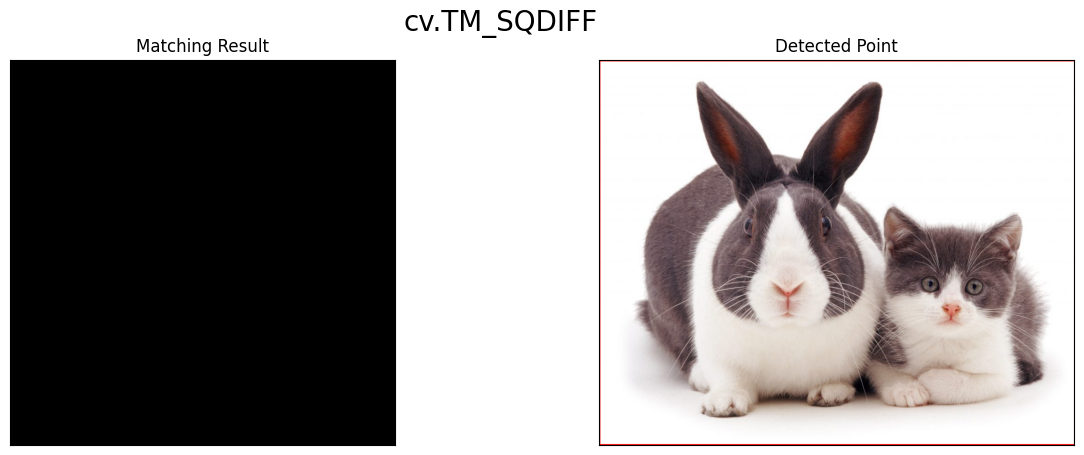

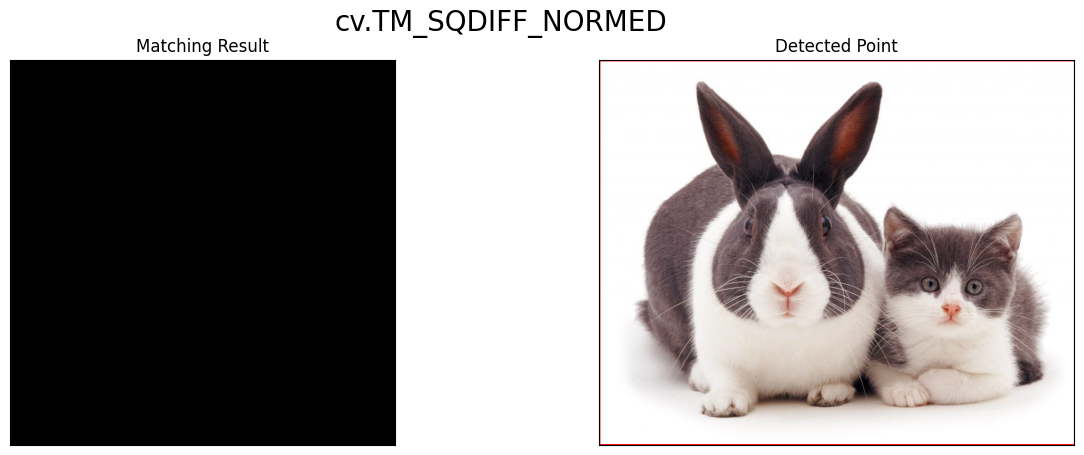

In [4]:
img = cv.imread('/content/drive/MyDrive/Gambar/cats_and_bunnies.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/Gambar/cats_and_bunnies.jpg', 0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) # membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

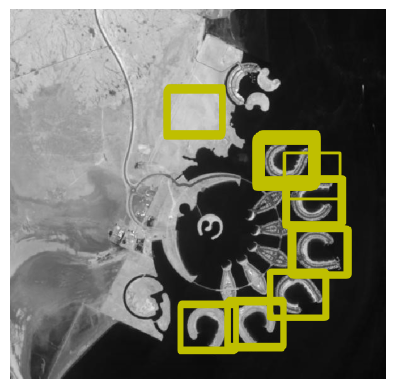

In [7]:
from skimage.io import imread
from skimage.feature import match_template
from skimage.color import rgb2gray

# Load the input img3 and template
img3 = rgb2gray(imread('/content/drive/MyDrive/Gambar/bahrain.jpg'))
template = rgb2gray(imread('/content/drive/MyDrive/Gambar/bahrain-template.jpg'))

# Hitung kemiripan citra dengan citra template
result = match_template(img3, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.4
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img3, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='y', facecolor='none')
    ax.add_patch(rect)
plt.show()


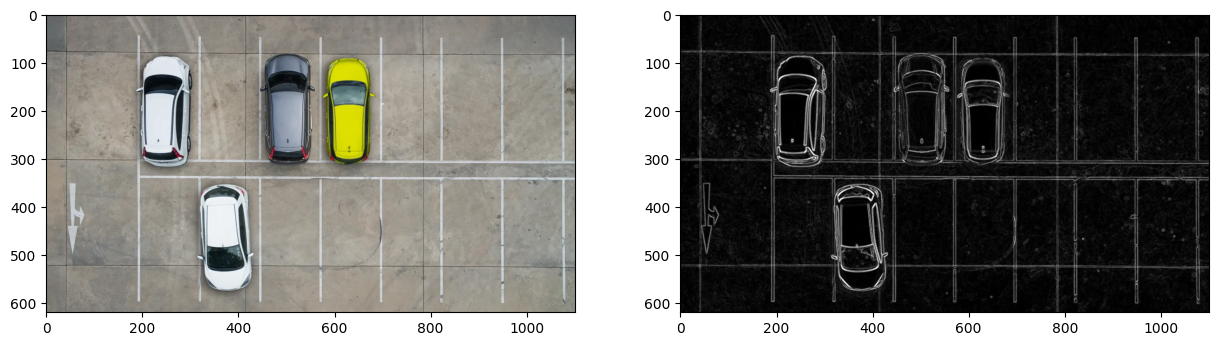

In [8]:
img4_1 = cv.imread('/content/drive/MyDrive/Gambar/car-park.jpg')

# converting to grayscale
gray = cv.cvtColor(img4_1, cv.COLOR_BGR2GRAY)

# remove noise
img_n = cv.GaussianBlur(gray, (3, 3), 0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img_n, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img_n, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img4_1, cv.COLOR_BGR2RGB))
axarr[1].imshow(img_sobelxy, cmap='gray')
plt.show()

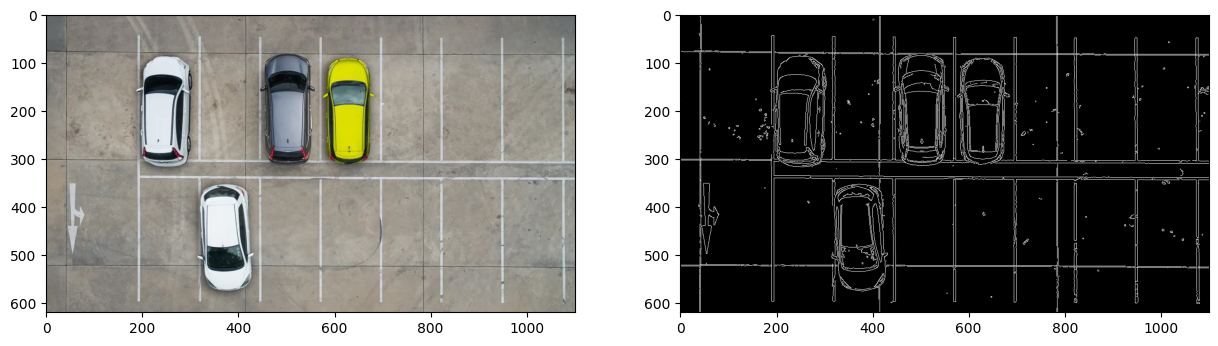

In [9]:

img4_2 = cv.imread('/content/drive/MyDrive/Gambar/car-park.jpg')

# detect edges using Canny
edged = cv.Canny(img4_2, 100, 200)

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img4_2, cv.COLOR_BGR2RGB))
axarr[1].imshow(edged, cmap='gray')
plt.show()

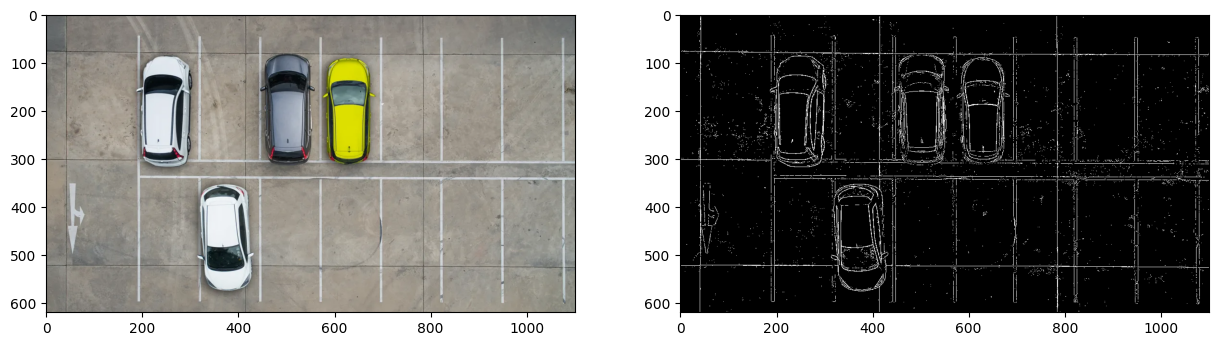

In [10]:
img4_3 = cv.imread('/content/drive/MyDrive/Gambar/car-park.jpg')

gray = cv.cvtColor(img4_3, cv.COLOR_BGR2GRAY)

# apply Laplacian operator
laplacian = cv.Laplacian(gray, cv.CV_64F)

# threshold the Laplacian to get a binary image
_, binary = cv.threshold(laplacian, 30, 255, cv.THRESH_BINARY)

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img4_3, cv.COLOR_BGR2RGB))
axarr[1].imshow(binary, cmap='gray')
plt.show()

# **5.a**

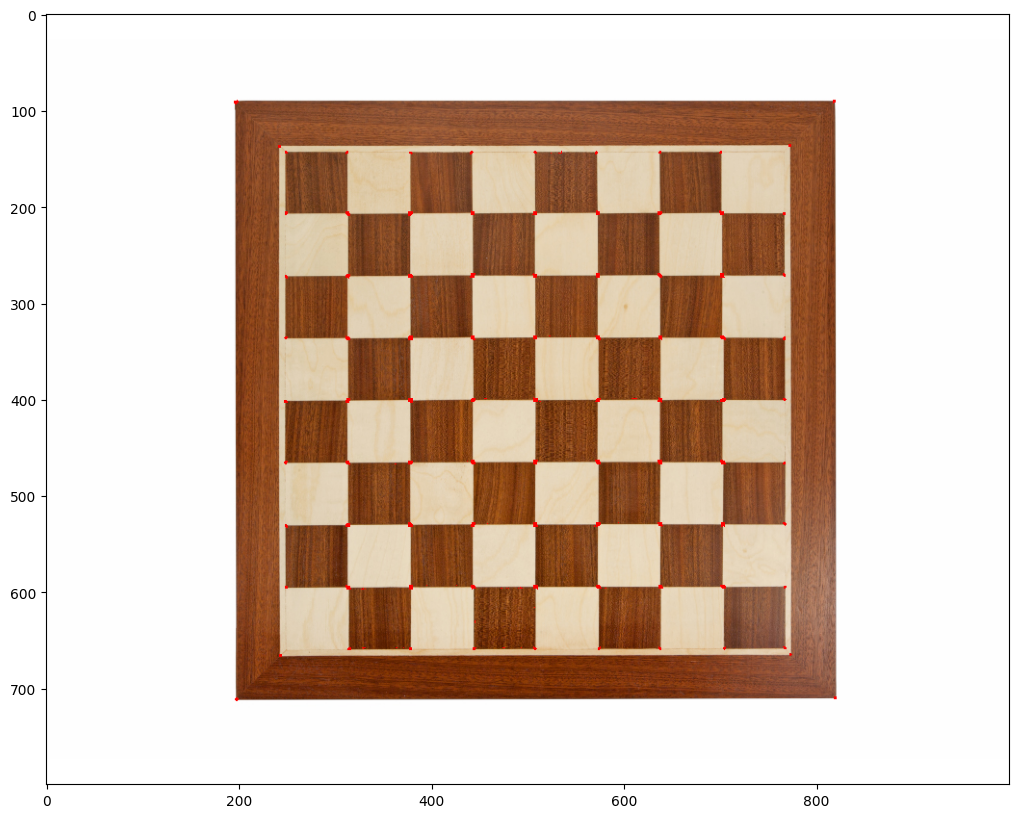

In [11]:
img5 = cv.imread('/content/drive/MyDrive/Gambar/chess-board.jpg')
img5_1 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(img5_1,3,1,0.04)

img_gray = np.float32(img5_1)
harris_output = cv.cornerHarris(img_gray,2,3, 3)

harris_output = cv.dilate(harris_output, None)

img5[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))

## **5.b**

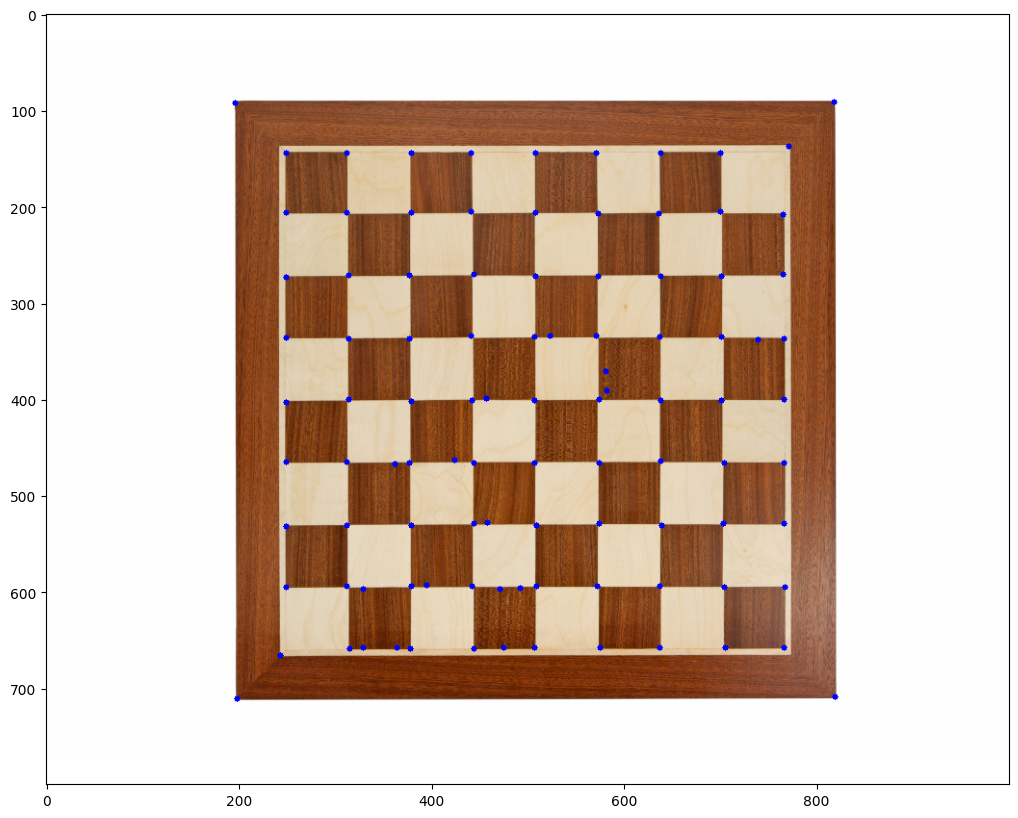

In [12]:
# Load image and convert to grayscale
img5_2 = cv.imread('/content/drive/MyDrive/Gambar/chess-board.jpg')
gray = cv.cvtColor(img5_2, cv.COLOR_BGR2GRAY)

# Apply Shi-Tomasi corner detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Draw detected corners on the original image
corners = np.int0(corners)
for corner in corners:
    x,y = corner.ravel()
    cv.circle(img5_2,(x,y),3,255,-1)

# Display the result
plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img5_2, cv.COLOR_BGR2RGB))
plt.show()

## **6**

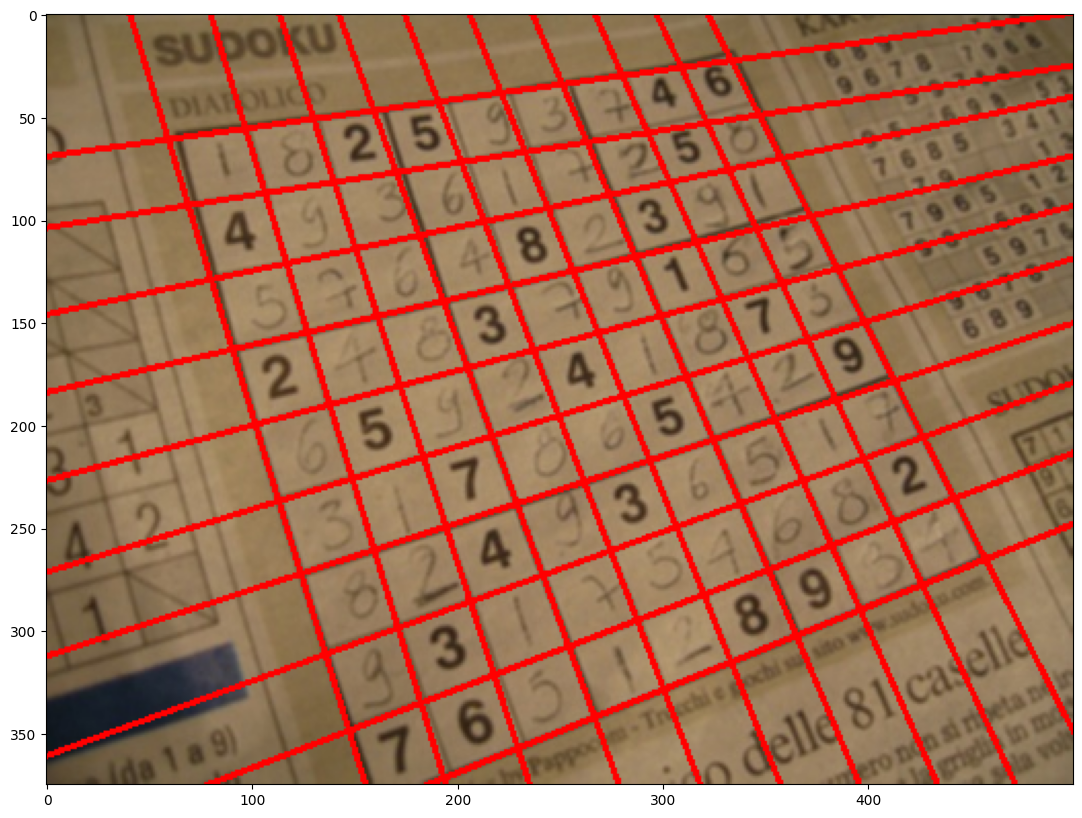

In [4]:
# membaca gambar sudoku.jpg
img_s = cv.imread('/content/drive/MyDrive/Gambar/sudoku.jpg')

# konversi gambar menjadi grayscale
img_gs = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

# deteksi tepi dengan metode Canny
edges = cv.Canny(img_gs, 90, 150, apertureSize=3)

# dilasi edge dengan kernel 3x3
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# erosi edge dengan kernel 5x5
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# deteksi garis menggunakan Hough Transform
lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

# filter garis dengan jarak rho_threshold = 15 dan sudut theta_threshold = 0.1
rho_threshold = 15
theta_threshold = 0.1
similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue
        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))
line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue
    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

filtered_lines = []
for i in range(len(lines)):
    if line_flags[i]:
        filtered_lines.append(lines[i])

# menggambar garis pada gambar asli
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(img_s, (x1, y1), (x2, y2), (0, 0, 255), 2)

# menampilkan gambar asli beserta hasil grid detection
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(img_s, cv.COLOR_BGR2RGB))

### 7

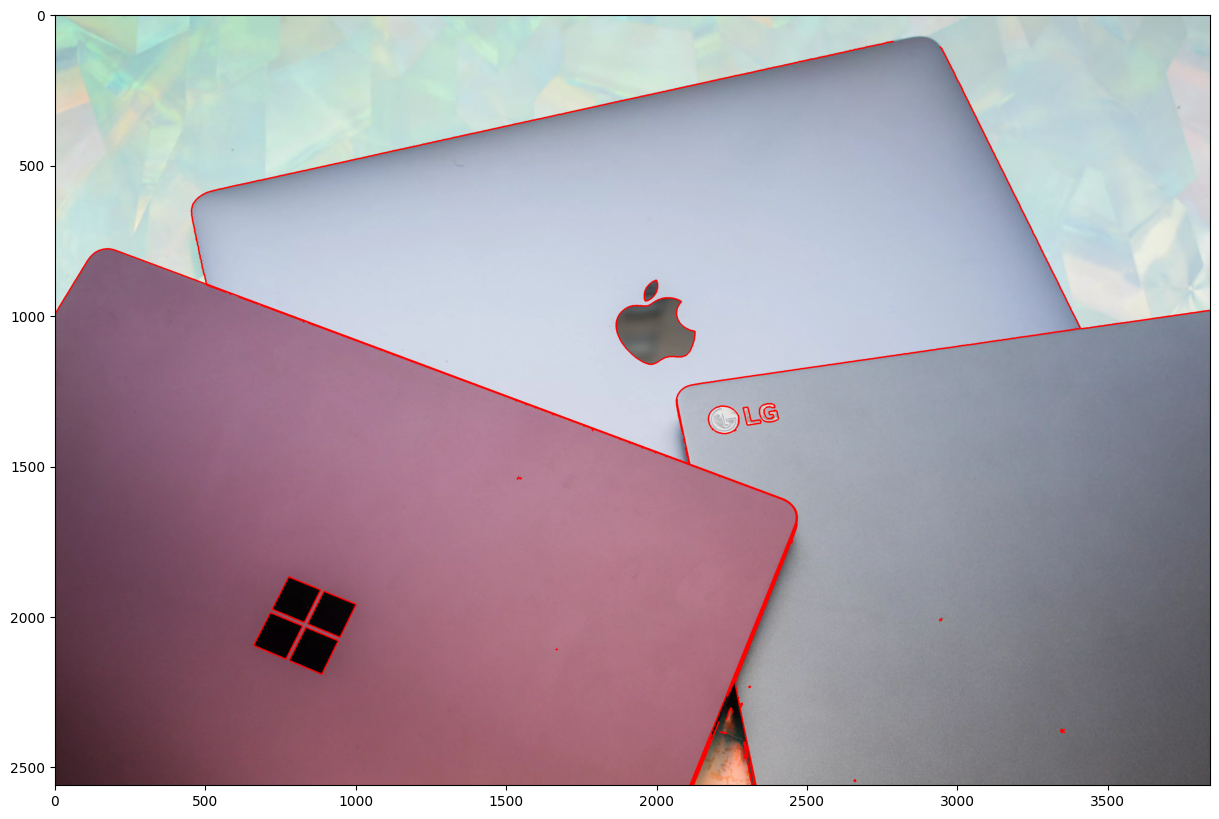

In [5]:
img = cv.imread('/content/drive/MyDrive/Gambar/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))